<a href="https://colab.research.google.com/github/anthonyosei/Mental-Health-Prediction-with-Machine-Learning-in-Tech/blob/main/New_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning for diagnosing and predicting Mental Health in Tech Community

Mental illness is one of the largest burden of disease in the UK. Severe mental disorders effect employees work performance, students academic performance and overall quality of life. Mental illnesses are more common, long-lasting and impactful than other health conditions. Not only impacts on individuals but also society. Mental ill health is responsible for 72 million working days lost and costs £34.9 billion each year (Mental Health First Aid England). Patients may avoid mental illness consequences by being provided with proper treatment after being diagnosed.

Digital healthcare technologies, e.g. Artificial Intelligence (AI) and Machine Learning(ML), has been growing interests in the application of the approach to address diagnostic and prediction issues in mental healthcare. Can we actually diagnose mental conditions properly with the aid of AI and ML? After the diagnoses, can the AI and ML systems tell how severe the condition is, and what might be the consequences? We might also consider the AI and ML treatment recommendations.

The aim of the project is to use AI and ML to support diagnosis, prediction and treatment of mental health disorders, particularly for people in tech community.   The specific objectives of the work can be summarized as:

• To develop AI and ML systems to diagnose mental health disorders

• To investigate AI and ML systems to predict consequences of a mental health disorder

In [ ]:
# Importing dependencies
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load the dataset
filename = '/content/drive/MyDrive/MentalHealthPredictionProject - Copy/data/Survey_Data.csv'
df = pd.read_csv(filename)


In [ ]:
# read the dataset
df

,ResponseID,Are you selfemployed,How many employees does your company or organization have,Is your employer primarily a tech companyorganization,Is your primary role within your company related to techIT,Do you have previous employers,Do you have a family history of mental illness,Have you had a mental health disorder in the past,Do you currently have a mental health disorder,"If yes, what conditions have you been diagnosed with",...,What country do you live in,What US state or territory do you live in,What country do you work in,What US state or territory do you work in,Which of the following best describes your work position,Do you work remotely,Question Group,Question about speaking openly about mental health vs physical health,Question,Response
0,r00000,False,26-100,True,NaN,True,No,Yes,No,NaN,...,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes,Resources for employees with mental health dis...,No,Does your employer provide mental health benef...,Not eligible for coverage / N/A
1,r00000,False,26-100,True,NaN,True,No,Yes,No,NaN,...,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes,Resources for employees with mental health dis...,No,Do you know the options for mental health care...,NaN
2,r00000,False,26-100,True,NaN,True,No,Yes,No,NaN,...,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes,Safe and supportive workplce for those with me...,No,Has your employer ever formally discussed ment...,No
3,r00000,False,26-100,True,NaN,True,No,Yes,No,NaN,...,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes,Resources for employees with mental health dis...,No,Does your employer offer resources to learn mo...,No
4,r00000,False,26-100,True,NaN,True,No,Yes,No,NaN,...,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes,Resources for employees with mental health dis...,No,Is your anonymity protected if you choose to t...,I don't know
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60181,r01432,False,100-500,True,NaN,False,I don't know,Yes,Yes,Obsessive-Compulsive Disorder|Eating Disorder ...,...,Canada,NaN,Canada,NaN,Other,Sometimes,Speaking openly about a mental health disorder,No,How willing would you be to share with friends...,Somewhat open
60182,r01432,False,100-500,True,NaN,False,I don't know,Yes,Yes,Obsessive-Compulsive Disorder|Eating Disorder ...,...,Canada,NaN,Canada,NaN,Other,Sometimes,Safe and supportive workplce for those with me...,No,Have you observed or experienced an unsupporti...,Maybe/Not sure
60183,r01432,False,100-500,True,NaN,False,I don't know,Yes,Yes,Obsessive-Compulsive Disorder|Eating Disorder ...,...,Canada,NaN,Canada,NaN,Other,Sometimes,Safe and supportive workplce for those with me...,No,Have your observations of how another individu...,No
60184,r01432,False,100-500,True,NaN,False,I don't know,Yes,Yes,Obsessive-Compulsive Disorder|Eating Disorder ...,...,Canada,NaN,Canada,NaN,Other,Sometimes,Impact of mental disorders on worker productivity,No,"If you have a mental health issue, do you feel...",Not applicable to me


In [ ]:
# check information on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60186 entries, 0 to 60185
Data columns (total 27 columns):
 #   Column                                                                                      Non-Null Count  Dtype  
---  ------                                                                                      --------------  -----  
 0   ResponseID                                                                                  60186 non-null  object 
 1   Are you selfemployed                                                                        60186 non-null  bool   
 2   How many employees does your company or organization have                                   48132 non-null  object 
 3   Is your employer primarily a tech companyorganization                                       48132 non-null  object 
 4   Is your primary role within your company related to techIT                                  11046 non-null  object 
 5   Do you have previous employers         

In [ ]:
# check the shape of the dataset (columns and rows)
print(df.shape)

# store the total rows in a variable
rows= df.shape[0]
print('The total number of rows/entries are', rows)

(60186, 27)
The total number of rows/entries are 60186


### Columns Cleaning


How many employees does your company or organization have (Column)

In [ ]:
# find unique entries in this column
df['How many employees does your company or organization have'].unique()

array(['26-100', '6-25', nan, 'More than 1000', '100-500', '500-1000',
       '1-5'], dtype=object)

We used the unique() method to identfy all the unique values in the DataFrames.
In this case, the df has the various employee ranges which finds the unique entries in the column. The end results displayed the distinct employee ranges available in the DataFrame.

In [ ]:
# find the mode in this column
employee_mode =df['How many employees does your company or organization have'].mode()
print('The most occuring number of emplyees is: ')
employee_mode

The most occuring number of emplyees is: 


0    26-100
Name: How many employees does your company or organization have, dtype: object

In [ ]:
df['How many employees does your company or organization have']= df['How many employees does your company or organization have'].fillna('26-100')

In [ ]:
df['How many employees does your company or organization have'].unique()

array(['26-100', '6-25', 'More than 1000', '100-500', '500-1000', '1-5'],
      dtype=object)

In [ ]:
df['Is your employer primarily a tech companyorganization'].unique()

array([True, nan, False], dtype=object)

In [ ]:
df['If yes, what conditions have you been diagnosed with'].count()/60186

0.3963712491277041

### What country do you live in

In [ ]:
country_counts = df['What country do you live in'].value_counts()/rows
country_counts

What country do you live in
United States of America    0.586183
United Kingdom              0.125611
Canada                      0.054431
Germany                     0.040475
Netherlands                 0.033496
Australia                   0.024424
Sweden                      0.013259
France                      0.011165
Ireland                     0.010468
Switzerland                 0.006978
Brazil                      0.006978
New Zealand                 0.006281
India                       0.006281
Russia                      0.006281
Bulgaria                    0.004885
Finland                     0.004885
Denmark                     0.004885
Italy                       0.003489
Belgium                     0.003489
South Africa                0.002791
Romania                     0.002791
Spain                       0.002791
Poland                      0.002791
Austria                     0.002791
Norway                      0.002094
Pakistan                    0.002094
Chile     

# Replace all entries with less than 10% entries

In [ ]:
# identify all entries with less than 10% input
countries_entries = list(country_counts[country_counts<0.10].index)

### change all entries with less than 10% with 'Other'
for index, i in enumerate(countries_entries):
    df['What country do you live in'] = df['What country do you live in'].replace(i,'Other')


We replaced all entries of countries with less than 10% of the total entries with 'Other

In [ ]:
# check the country column
df['What country do you live in'].unique()

array(['United Kingdom', 'United States of America', 'Other'],
      dtype=object)

### What country do you work in

In [ ]:
country_counts = df['What country do you work in'].value_counts()/rows
country_counts

What country do you work in
United States of America    0.593859
United Kingdom              0.127704
Canada                      0.051640
Germany                     0.040475
Netherlands                 0.032798
Australia                   0.023726
Sweden                      0.013957
Ireland                     0.010468
France                      0.009770
Switzerland                 0.006978
Brazil                      0.006978
India                       0.006281
Russia                      0.006281
New Zealand                 0.006281
Denmark                     0.004885
Bulgaria                    0.004885
Finland                     0.004885
Belgium                     0.003489
South Africa                0.002791
Poland                      0.002791
Austria                     0.002791
Czech Republic              0.002094
Italy                       0.002094
Chile                       0.002094
Norway                      0.002094
Romania                     0.002094
Spain     

In [ ]:
# identify all entries with less than 10% input
countries_entries = list(country_counts[country_counts<0.10].index)

### change all entries with less than 10% with 'Other'
for index, i in enumerate(countries_entries):
    df['What country do you work in'] = df['What country do you work in'].replace(i,'Other')


In [ ]:
df['What country do you work in'].unique()

array(['United Kingdom', 'United States of America', 'Other'],
      dtype=object)

### What US state or territory do you live in

In [ ]:
df['What US state or territory do you live in'].unique()

array([nan, 'Illinois', 'Tennessee', 'Virginia', 'California', 'Kentucky',
       'Oregon', 'Pennsylvania', 'New Jersey', 'Georgia', 'Washington',
       'New York', 'Indiana', 'Minnesota', 'West Virginia', 'Florida',
       'Massachusetts', 'North Dakota', 'Texas', 'Maryland', 'Wisconsin',
       'Michigan', 'Vermont', 'North Carolina', 'Kansas',
       'District of Columbia', 'Nevada', 'Utah', 'Connecticut',
       'Colorado', 'Ohio', 'Iowa', 'South Dakota', 'Nebraska', 'Maine',
       'Missouri', 'Arizona', 'Oklahoma', 'Idaho', 'Rhode Island',
       'Alabama', 'Louisiana', 'South Carolina', 'New Hampshire',
       'New Mexico', 'Montana', 'Alaska', 'Delaware'], dtype=object)

## COUNTRY AND STATE CLEANING

In [ ]:
# extract all countries and states columns
country_state = ['What country do you live in', 'What US state or territory do you live in', 'What country do you work in', 'What US state or territory do you work in']

# create a dataframe for the countries and states
country_state_df = df[country_state]

# display the new dataframe
country_state_df

,What country do you live in,What US state or territory do you live in,What country do you work in,What US state or territory do you work in
0,United Kingdom,NaN,United Kingdom,NaN
1,United Kingdom,NaN,United Kingdom,NaN
2,United Kingdom,NaN,United Kingdom,NaN
3,United Kingdom,NaN,United Kingdom,NaN
4,United Kingdom,NaN,United Kingdom,NaN
...,...,...,...,...
60181,Other,NaN,Other,NaN
60182,Other,NaN,Other,NaN
60183,Other,NaN,Other,NaN
60184,Other,NaN,Other,NaN


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

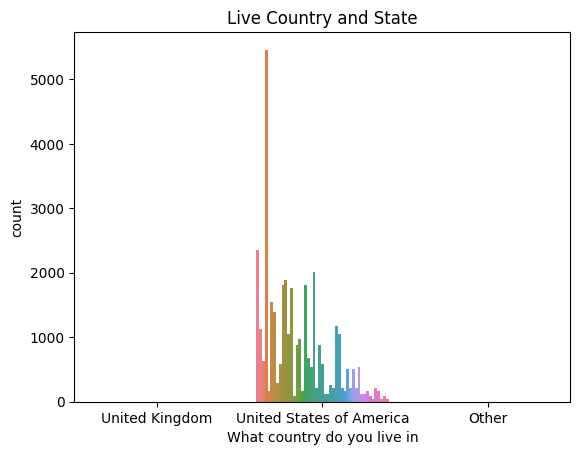

In [ ]:
sns.countplot(x = df['What country do you live in'], hue = df['What US state or territory do you live in'],data= country_state_df)
plt.title('Live Country and State')
plt.legend([], [], frameon=False)
plt.show()

From this, it can be evident that only indiviuals with country as United States of America had an entry in the states column since that question was only applied to those with US as country

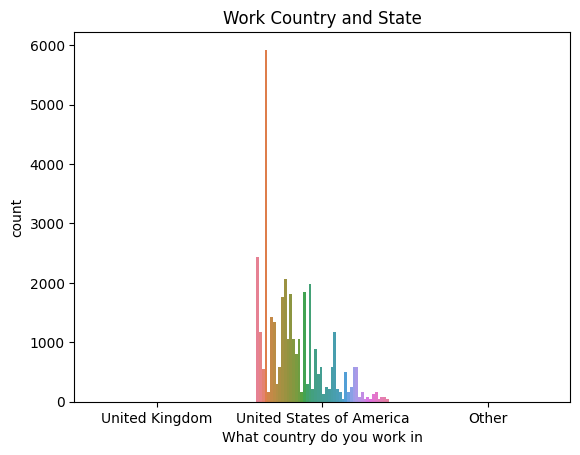

In [ ]:
sns.countplot(x = df['What country do you work in'], hue = df['What US state or territory do you work in'],data= country_state_df)
plt.title('Work Country and State')
plt.legend([], [], frameon=False)
plt.show()

From this, it can be evident that only indiviuals with country as United States of America had an entry in the states column sincec that question was only applied to those with US as country

In [ ]:
df['What US state or territory do you live in'] = df['What US state or territory do you live in'].fillna('N/A')

In [ ]:
df['What US state or territory do you work in'] = df['What US state or territory do you work in'].fillna('N/A')

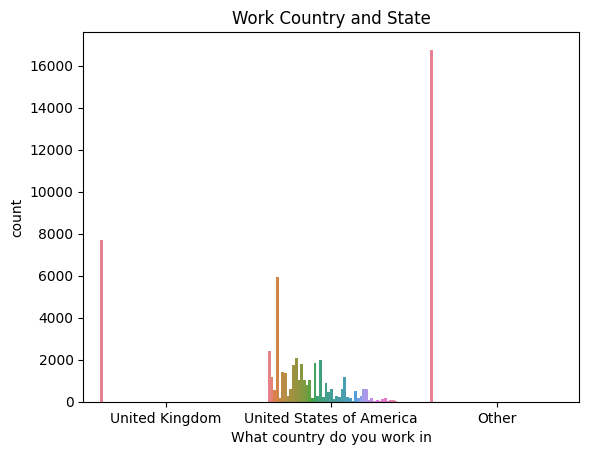

In [ ]:
sns.countplot(x = df['What country do you work in'], hue = df['What US state or territory do you work in'],data= country_state_df)
plt.title('Work Country and State')
plt.legend([], [], frameon=False)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60186 entries, 0 to 60185
Data columns (total 27 columns):
 #   Column                                                                                      Non-Null Count  Dtype  
---  ------                                                                                      --------------  -----  
 0   ResponseID                                                                                  60186 non-null  object 
 1   Are you selfemployed                                                                        60186 non-null  bool   
 2   How many employees does your company or organization have                                   60186 non-null  object 
 3   Is your employer primarily a tech companyorganization                                       48132 non-null  object 
 4   Is your primary role within your company related to techIT                                  11046 non-null  object 
 5   Do you have previous employers         

### What is your age

In [ ]:
# check the unique values in the age column
df['What is your age'].unique()

array([39., 29., 38., 43., 42., 30., 37., 44., 28., 34., 35., 52., 32.,
       25., 31., 26., 33., 27., 36., 40., 46., 41., 45., 19., 21., 24.,
       17., 23., 22., 51., 48., 55., 50., 49., 20., 54., 47., 56., 57.,
       63., 99., 61., nan, 62., 53., 58., 66., 59., 15., 65., 74., 70.])

In [ ]:
df['What is your age'] = df['What is your age'].fillna('None')

In [ ]:
# check age group
df['Age Group'].unique()

array(['36-40', '26-30', '41-45', '31-35', '51-55', '20-25', '46-50',
       'Under 20', '56-60', '61-65', 'Over 65'], dtype=object)

In [ ]:
# store ages under 20 years
under_20 = range(16,20)

# loop through to find null values and fix it using the mean of the age_group
for index , row in enumerate(df['What is your age']):
    if row == 'None':
        if df['Age Group'][index] == 'Under 20':
            df['What is your age'][index] = round(sum(under_20)/len(under_20))
# change the datatype to int
df['What is your age'] = df['What is your age'].astype('int')

<ipython-input-42-a70c7f659ea7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['What is your age'][index] = round(sum(under_20)/len(under_20))
<ipython-input-42-a70c7f659ea7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['What is your age'][index] = round(sum(under_20)/len(under_20))
<ipython-input-42-a70c7f659ea7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['What is your age'][index] = round(sum(under_20)/len(under_

In [ ]:
df['What is your age'].unique()

array([39, 29, 38, 43, 42, 30, 37, 44, 28, 34, 35, 52, 32, 25, 31, 26, 33,
       27, 36, 40, 46, 41, 45, 19, 21, 24, 17, 23, 22, 51, 48, 55, 50, 49,
       20, 54, 47, 56, 57, 63, 99, 61, 18, 62, 53, 58, 66, 59, 15, 65, 74,
       70])

### Gender

In [ ]:
# check the number of unique entries in the gender column
df['What is your gender '].unique()

array(['Male', 'Female', 'Trans/Other'], dtype=object)

In [ ]:
# columns with 60% less responses.
columns = []

# loop through to find the columns with low responses
for i in df.columns:
    if ((df[i].count() / 60186)< 0.6):
        # append the columns to the columns list
        columns.append(i)

In [ ]:
# display the columns
columns

['Is your primary role within your company related to techIT',
 'If yes, what conditions have you been diagnosed with',
 'If maybe, what conditions do you believe you have',
 'If so, what conditions were you diagnosed with']

In [ ]:
# Exclude the second model column
del columns[3]
columns

# Drop all the low entry columns
df.drop(columns, axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60186 entries, 0 to 60185
Data columns (total 24 columns):
 #   Column                                                                                      Non-Null Count  Dtype 
---  ------                                                                                      --------------  ----- 
 0   ResponseID                                                                                  60186 non-null  object
 1   Are you selfemployed                                                                        60186 non-null  bool  
 2   How many employees does your company or organization have                                   60186 non-null  object
 3   Is your employer primarily a tech companyorganization                                       48132 non-null  object
 4   Do you have previous employers                                                              60186 non-null  bool  
 5   Do you have a family history of mental illness

In [ ]:
df['Is your employer primarily a tech companyorganization'].unique()

array([True, nan, False], dtype=object)

In [ ]:
df['Is your employer primarily a tech companyorganization'].nunique()

2

In [ ]:
print(f"{round(df['Is your employer primarily a tech companyorganization'].value_counts()/rows*100)}")

Is your employer primarily a tech companyorganization
True     62.0
False    18.0
Name: count, dtype: float64


In [ ]:
from scipy import stats

In [ ]:
def chi_square(column):
    crosstab = pd.crosstab(df['Have you been diagnosed with a mental health condition by a medical professional'], df[column])
    return stats.chi2_contingency(crosstab)[1]

In [ ]:
insignificant_p_columns = []
for column in df.columns:
    p_value = chi_square(column)
    if p_value >= 1.0:
        insignificant_p_columns.append(column)

insignificant_p_columns

del insignificant_p_columns[0]
insignificant_p_columns

['Question Group',
 'Question about speaking openly about mental health vs physical health',
 'Question']

In [ ]:
df['Question'].isna().sum()

0

In [ ]:
df['Response'].isna().sum()

16340

In [ ]:
# question and response
ques_ans_feat = ['Question','Response']
ques_ans = df[ques_ans_feat]
ques_ans.head(5)

,Question,Response
0,Does your employer provide mental health benef...,Not eligible for coverage / N/A
1,Do you know the options for mental health care...,NaN
2,Has your employer ever formally discussed ment...,No
3,Does your employer offer resources to learn mo...,No
4,Is your anonymity protected if you choose to t...,I don't know


In [ ]:
df = df.drop(insignificant_p_columns, axis = 1)

In [ ]:
# Function to find outliers in Age column
def outlier(df):
    #Takes in a dataframe and returns a list of outliers > 99th and < 1 percentile#
    outlier = []
    for i in df:
        q1 = np.percentile(df, .5)
        q3 = np.percentile(df, 99.5)
        if i > q3 or i < q1:
            outlier.append(i)
    print("Outlier:", outlier)
    return outlier

In [ ]:
# identify age outliers
age_outlier = outlier(df['What is your age'])

Outlier: [17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15

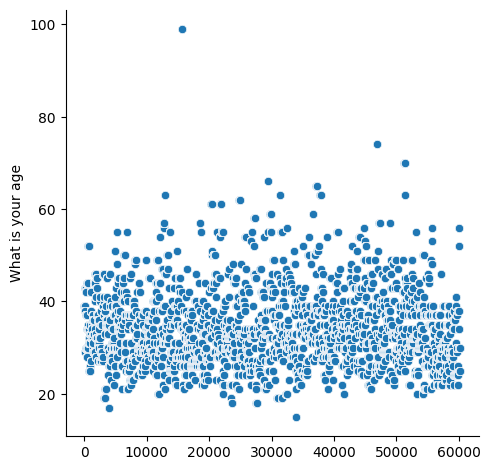

In [ ]:
# plot to verify the outliers
sns.relplot(df['What is your age'])

In [ ]:
df = df.loc[~df['What is your age'].isin(age_outlier)]

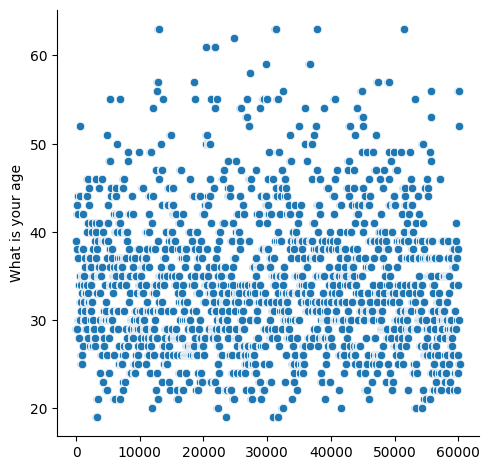

In [ ]:
sns.relplot(df['What is your age'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59808 entries, 0 to 60185
Data columns (total 21 columns):
 #   Column                                                                                      Non-Null Count  Dtype 
---  ------                                                                                      --------------  ----- 
 0   ResponseID                                                                                  59808 non-null  object
 1   Are you selfemployed                                                                        59808 non-null  bool  
 2   How many employees does your company or organization have                                   59808 non-null  object
 3   Is your employer primarily a tech companyorganization                                       47838 non-null  object
 4   Do you have previous employers                                                              59808 non-null  bool  
 5   Do you have a family history of mental illness     

In [ ]:
# # Drop descriptive columns
# df = df[df.columns.drop(list(df.filter(regex='Why')))]
# df = df[df.columns.drop(list(df.filter(regex='Describe')))]
# df = df[df.columns.drop(list(df.filter(regex='describe')))]
# df = df[df.columns.drop(list(df.filter(regex='tell')))]


In [ ]:
df

,ResponseID,Are you selfemployed,How many employees does your company or organization have,Is your employer primarily a tech companyorganization,Do you have previous employers,Do you have a family history of mental illness,Have you had a mental health disorder in the past,Do you currently have a mental health disorder,Have you been diagnosed with a mental health condition by a medical professional,"If so, what conditions were you diagnosed with",...,What is your age,What is your gender,Age Group,What country do you live in,What US state or territory do you live in,What country do you work in,What US state or territory do you work in,Which of the following best describes your work position,Do you work remotely,Response
0,r00000,False,26-100,True,True,No,Yes,No,True,"Anxiety Disorder (Generalized, Social, Phobia,...",...,39,Male,36-40,United Kingdom,N/A,United Kingdom,N/A,Back-end Developer,Sometimes,Not eligible for coverage / N/A
1,r00000,False,26-100,True,True,No,Yes,No,True,"Anxiety Disorder (Generalized, Social, Phobia,...",...,39,Male,36-40,United Kingdom,N/A,United Kingdom,N/A,Back-end Developer,Sometimes,NaN
2,r00000,False,26-100,True,True,No,Yes,No,True,"Anxiety Disorder (Generalized, Social, Phobia,...",...,39,Male,36-40,United Kingdom,N/A,United Kingdom,N/A,Back-end Developer,Sometimes,No
3,r00000,False,26-100,True,True,No,Yes,No,True,"Anxiety Disorder (Generalized, Social, Phobia,...",...,39,Male,36-40,United Kingdom,N/A,United Kingdom,N/A,Back-end Developer,Sometimes,No
4,r00000,False,26-100,True,True,No,Yes,No,True,"Anxiety Disorder (Generalized, Social, Phobia,...",...,39,Male,36-40,United Kingdom,N/A,United Kingdom,N/A,Back-end Developer,Sometimes,I don't know
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60181,r01432,False,100-500,True,False,I don't know,Yes,Yes,False,NaN,...,25,Trans/Other,20-25,Other,N/A,Other,N/A,Other,Sometimes,Somewhat open
60182,r01432,False,100-500,True,False,I don't know,Yes,Yes,False,NaN,...,25,Trans/Other,20-25,Other,N/A,Other,N/A,Other,Sometimes,Maybe/Not sure
60183,r01432,False,100-500,True,False,I don't know,Yes,Yes,False,NaN,...,25,Trans/Other,20-25,Other,N/A,Other,N/A,Other,Sometimes,No
60184,r01432,False,100-500,True,False,I don't know,Yes,Yes,False,NaN,...,25,Trans/Other,20-25,Other,N/A,Other,N/A,Other,Sometimes,Not applicable to me


In [ ]:
#Renaming columns
df.rename(columns = {
        'What is your age' : 'Age',
        'What is your gender' : 'Gender',
        'Are you selfemployed' : 'Is self-employed',
        'Is your employer primarily a tech companyorganization' : 'Works at a tech company',
        'What is your gender ' : 'Gender',
        'What country do you live in' : 'Country live',
        'What US state or territory do you live in' : 'US State live',
        'What country do you work in' : 'Country work',
        'What US state or territory do you work in' : 'US State work',
        'Which of the following best describes your work position' : 'Work position',
        'How many employees does your company or organization have' : 'Comp_employees',
        'Have you been diagnosed with a mental health condition by a medical professional': 'diagnosed_mh',
        'Have you ever sought treatment for a mental health issue from a mental health professional': 'Sought_mh_treat',
        'Do you work remotely': 'Work remotely',
        'Have you had a mental health disorder in the past' : 'prev_mh',
        'Do you have a family history of mental illness': 'fam_mh_illness',
        'If so, what conditions were you diagnosed with' : 'So:What_diagnosis?',
        'Do you currently have a mental health disorder' : 'Has MHD'}, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59808 entries, 0 to 60185
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   ResponseID                      59808 non-null  object
 1   Is self-employed                59808 non-null  bool  
 2   Comp_employees                  59808 non-null  object
 3   Works at a tech company         47838 non-null  object
 4   Do you have previous employers  59808 non-null  bool  
 5   fam_mh_illness                  59808 non-null  object
 6   prev_mh                         59808 non-null  object
 7   Has MHD                         59808 non-null  object
 8   diagnosed_mh                    59808 non-null  bool  
 9   So:What_diagnosis?              29652 non-null  object
 10  Sought_mh_treat                 59808 non-null  bool  
 11  Age                             59808 non-null  int64 
 12  Gender                          59808 non-null  obj

In [ ]:
df

,ResponseID,Is self-employed,Comp_employees,Works at a tech company,Do you have previous employers,fam_mh_illness,prev_mh,Has MHD,diagnosed_mh,So:What_diagnosis?,...,Age,Gender,Age Group,Country live,US State live,Country work,US State work,Work position,Work remotely,Response
0,r00000,False,26-100,True,True,No,Yes,No,True,"Anxiety Disorder (Generalized, Social, Phobia,...",...,39,Male,36-40,United Kingdom,N/A,United Kingdom,N/A,Back-end Developer,Sometimes,Not eligible for coverage / N/A
1,r00000,False,26-100,True,True,No,Yes,No,True,"Anxiety Disorder (Generalized, Social, Phobia,...",...,39,Male,36-40,United Kingdom,N/A,United Kingdom,N/A,Back-end Developer,Sometimes,NaN
2,r00000,False,26-100,True,True,No,Yes,No,True,"Anxiety Disorder (Generalized, Social, Phobia,...",...,39,Male,36-40,United Kingdom,N/A,United Kingdom,N/A,Back-end Developer,Sometimes,No
3,r00000,False,26-100,True,True,No,Yes,No,True,"Anxiety Disorder (Generalized, Social, Phobia,...",...,39,Male,36-40,United Kingdom,N/A,United Kingdom,N/A,Back-end Developer,Sometimes,No
4,r00000,False,26-100,True,True,No,Yes,No,True,"Anxiety Disorder (Generalized, Social, Phobia,...",...,39,Male,36-40,United Kingdom,N/A,United Kingdom,N/A,Back-end Developer,Sometimes,I don't know
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60181,r01432,False,100-500,True,False,I don't know,Yes,Yes,False,NaN,...,25,Trans/Other,20-25,Other,N/A,Other,N/A,Other,Sometimes,Somewhat open
60182,r01432,False,100-500,True,False,I don't know,Yes,Yes,False,NaN,...,25,Trans/Other,20-25,Other,N/A,Other,N/A,Other,Sometimes,Maybe/Not sure
60183,r01432,False,100-500,True,False,I don't know,Yes,Yes,False,NaN,...,25,Trans/Other,20-25,Other,N/A,Other,N/A,Other,Sometimes,No
60184,r01432,False,100-500,True,False,I don't know,Yes,Yes,False,NaN,...,25,Trans/Other,20-25,Other,N/A,Other,N/A,Other,Sometimes,Not applicable to me


In [ ]:
temp1= df.isnull().sum()
print(' The number of null values in each column are')
temp1

 The number of null values in each column are


ResponseID                            0
Is self-employed                      0
Comp_employees                        0
Works at a tech company           11970
Do you have previous employers        0
fam_mh_illness                        0
prev_mh                               0
Has MHD                               0
diagnosed_mh                          0
So:What_diagnosis?                30156
Sought_mh_treat                       0
Age                                   0
Gender                                0
Age Group                             0
Country live                          0
US State live                         0
Country work                          0
US State work                         0
Work position                         0
Work remotely                         0
Response                          16240
dtype: int64

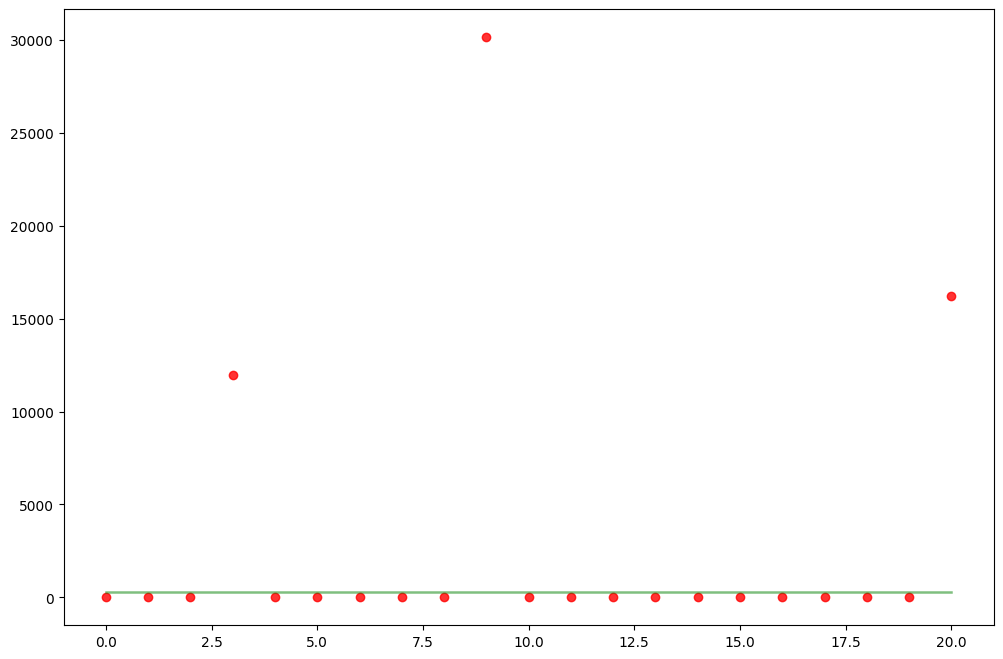

In [ ]:
plt.figure(figsize = (12,8))
plt.plot(range(len(temp1.values)),[292]*len(temp1.values), alpha = 0.5, linewidth = 1.8, color = 'green')
plt.scatter(range(len(temp1.values)),temp1.values,alpha = 0.8,color = 'red')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59808 entries, 0 to 60185
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   ResponseID                      59808 non-null  object
 1   Is self-employed                59808 non-null  bool  
 2   Comp_employees                  59808 non-null  object
 3   Works at a tech company         47838 non-null  object
 4   Do you have previous employers  59808 non-null  bool  
 5   fam_mh_illness                  59808 non-null  object
 6   prev_mh                         59808 non-null  object
 7   Has MHD                         59808 non-null  object
 8   diagnosed_mh                    59808 non-null  bool  
 9   So:What_diagnosis?              29652 non-null  object
 10  Sought_mh_treat                 59808 non-null  bool  
 11  Age                             59808 non-null  int64 
 12  Gender                          59808 non-null  obj

In [ ]:
# fill all null values in the 'Works at a tech company' column with 'N/A'
df['Works at a tech company'] = df['Works at a tech company'].fillna('N/A')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59808 entries, 0 to 60185
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   ResponseID                      59808 non-null  object
 1   Is self-employed                59808 non-null  bool  
 2   Comp_employees                  59808 non-null  object
 3   Works at a tech company         59808 non-null  object
 4   Do you have previous employers  59808 non-null  bool  
 5   fam_mh_illness                  59808 non-null  object
 6   prev_mh                         59808 non-null  object
 7   Has MHD                         59808 non-null  object
 8   diagnosed_mh                    59808 non-null  bool  
 9   So:What_diagnosis?              29652 non-null  object
 10  Sought_mh_treat                 59808 non-null  bool  
 11  Age                             59808 non-null  int64 
 12  Gender                          59808 non-null  obj

In [ ]:
df = df.drop(columns='ResponseID', axis=1)

In [ ]:
df['Work position'] = df['Work position'].str.split('[^\w@.+]').str[:1].apply(''.join)

In [ ]:
df['Work position']

0         Back
1         Back
2         Back
3         Back
4         Back
         ...  
60181    Other
60182    Other
60183    Other
60184    Other
60185    Other
Name: Work position, Length: 59808, dtype: object

In [ ]:
for index, i in enumerate(df['Work position']):
    if 'Back' in i:
        df['Work position'][index]= 'Back-end Developer'
    elif 'One' in i:
        df['Work position'][index]= 'One-person Shop'
    elif 'Front' in i:
        df['Work position'][index]= 'Front-end Developer'
    else:
        pass

Streaming output truncated to the last 5000 lines.
<ipython-input-78-16ae8e66002b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Work position'][index]= 'Back-end Developer'
<ipython-input-78-16ae8e66002b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Work position'][index]= 'Back-end Developer'
<ipython-input-78-16ae8e66002b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Work position'][index]= 'Back-end Developer

In [ ]:
df['Work position']

0        Back-end Developer
1        Back-end Developer
2        Back-end Developer
3        Back-end Developer
4        Back-end Developer
                ...        
60181                 Other
60182                 Other
60183                 Other
60184                 Other
60185                 Other
Name: Work position, Length: 59808, dtype: object

In [ ]:
df
#df['Work position'] = df['Work position'][(df['Work position'].where(df['Work position'].str.startswith('Su'))) & (df['Work position'].str.endswith('/'))]

,Is self-employed,Comp_employees,Works at a tech company,Do you have previous employers,fam_mh_illness,prev_mh,Has MHD,diagnosed_mh,So:What_diagnosis?,Sought_mh_treat,Age,Gender,Age Group,Country live,US State live,Country work,US State work,Work position,Work remotely,Response
0,False,26-100,True,True,No,Yes,No,True,"Anxiety Disorder (Generalized, Social, Phobia,...",False,39,Male,36-40,United Kingdom,N/A,United Kingdom,N/A,Back-end Developer,Sometimes,Not eligible for coverage / N/A
1,False,26-100,True,True,No,Yes,No,True,"Anxiety Disorder (Generalized, Social, Phobia,...",False,39,Male,36-40,United Kingdom,N/A,United Kingdom,N/A,Back-end Developer,Sometimes,NaN
2,False,26-100,True,True,No,Yes,No,True,"Anxiety Disorder (Generalized, Social, Phobia,...",False,39,Male,36-40,United Kingdom,N/A,United Kingdom,N/A,Back-end Developer,Sometimes,No
3,False,26-100,True,True,No,Yes,No,True,"Anxiety Disorder (Generalized, Social, Phobia,...",False,39,Male,36-40,United Kingdom,N/A,United Kingdom,N/A,Back-end Developer,Sometimes,No
4,False,26-100,True,True,No,Yes,No,True,"Anxiety Disorder (Generalized, Social, Phobia,...",False,39,Male,36-40,United Kingdom,N/A,United Kingdom,N/A,Back-end Developer,Sometimes,I don't know
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60181,False,100-500,True,False,I don't know,Yes,Yes,False,NaN,False,25,Trans/Other,20-25,Other,N/A,Other,N/A,Other,Sometimes,Somewhat open
60182,False,100-500,True,False,I don't know,Yes,Yes,False,NaN,False,25,Trans/Other,20-25,Other,N/A,Other,N/A,Other,Sometimes,Maybe/Not sure
60183,False,100-500,True,False,I don't know,Yes,Yes,False,NaN,False,25,Trans/Other,20-25,Other,N/A,Other,N/A,Other,Sometimes,No
60184,False,100-500,True,False,I don't know,Yes,Yes,False,NaN,False,25,Trans/Other,20-25,Other,N/A,Other,N/A,Other,Sometimes,Not applicable to me


In [ ]:
df['So:What_diagnosis?'] = df['So:What_diagnosis?'].fillna('No disorder')
df['So:What_diagnosis?'] = df['So:What_diagnosis?'].str.split('[(|]').str[:1].apply(''.join)
df['So:What_diagnosis?'].unique()

array(['Anxiety Disorder ', 'No disorder', 'Mood Disorder ',
       'Personality Disorder ',
       'Attention Deficit Hyperactivity Disorder',
       'Seasonal Affective Disorder', 'Burn out', 'PDD-NOS',
       'Post-traumatic Stress Disorder', 'Depression',
       'Gender Identity Disorder', 'Substance Use Disorder',
       'Addictive Disorder', 'Stress Response Syndromes', 'Autism ',
       'Obsessive-Compulsive Disorder', 'Psychotic Disorder ',
       'Eating Disorder ',
       'Autism - while not a "mental illness", still greatly affects how I handle anxiety',
       'attention deficit disorder ', 'Autism Spectrum Disorder',
       'Asperger Syndrome', 'ADD ', 'Schizotypal Personality Disorder',
       'autism spectrum disorder'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59808 entries, 0 to 60185
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Is self-employed                59808 non-null  bool  
 1   Comp_employees                  59808 non-null  object
 2   Works at a tech company         59808 non-null  object
 3   Do you have previous employers  59808 non-null  bool  
 4   fam_mh_illness                  59808 non-null  object
 5   prev_mh                         59808 non-null  object
 6   Has MHD                         59808 non-null  object
 7   diagnosed_mh                    59808 non-null  bool  
 8   So:What_diagnosis?              59808 non-null  object
 9   Sought_mh_treat                 59808 non-null  bool  
 10  Age                             59808 non-null  int64 
 11  Gender                          59808 non-null  object
 12  Age Group                       59808 non-null  obj

In [ ]:
# Fill all null values with 'No USA state' as those were not applicable to thsoe entries
df['US State live'] = df['US State live'].fillna('No US State')


In [ ]:
# Fill all null values with 'No USA state' as those were not applicable to thsoe entries
df['US State work'] = df['US State work'].fillna('No US State')

In [ ]:
df

,Is self-employed,Comp_employees,Works at a tech company,Do you have previous employers,fam_mh_illness,prev_mh,Has MHD,diagnosed_mh,So:What_diagnosis?,Sought_mh_treat,Age,Gender,Age Group,Country live,US State live,Country work,US State work,Work position,Work remotely,Response
0,False,26-100,True,True,No,Yes,No,True,Anxiety Disorder,False,39,Male,36-40,United Kingdom,N/A,United Kingdom,N/A,Back-end Developer,Sometimes,Not eligible for coverage / N/A
1,False,26-100,True,True,No,Yes,No,True,Anxiety Disorder,False,39,Male,36-40,United Kingdom,N/A,United Kingdom,N/A,Back-end Developer,Sometimes,NaN
2,False,26-100,True,True,No,Yes,No,True,Anxiety Disorder,False,39,Male,36-40,United Kingdom,N/A,United Kingdom,N/A,Back-end Developer,Sometimes,No
3,False,26-100,True,True,No,Yes,No,True,Anxiety Disorder,False,39,Male,36-40,United Kingdom,N/A,United Kingdom,N/A,Back-end Developer,Sometimes,No
4,False,26-100,True,True,No,Yes,No,True,Anxiety Disorder,False,39,Male,36-40,United Kingdom,N/A,United Kingdom,N/A,Back-end Developer,Sometimes,I don't know
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60181,False,100-500,True,False,I don't know,Yes,Yes,False,No disorder,False,25,Trans/Other,20-25,Other,N/A,Other,N/A,Other,Sometimes,Somewhat open
60182,False,100-500,True,False,I don't know,Yes,Yes,False,No disorder,False,25,Trans/Other,20-25,Other,N/A,Other,N/A,Other,Sometimes,Maybe/Not sure
60183,False,100-500,True,False,I don't know,Yes,Yes,False,No disorder,False,25,Trans/Other,20-25,Other,N/A,Other,N/A,Other,Sometimes,No
60184,False,100-500,True,False,I don't know,Yes,Yes,False,No disorder,False,25,Trans/Other,20-25,Other,N/A,Other,N/A,Other,Sometimes,Not applicable to me


In [ ]:
# fill null values in Response column with 'No response as these did not provide a response in that column'
df['Response'] = df['Response'].fillna('No response')

In [ ]:
# save the cleaned dataframe to csv
df.to_csv('cleaned_df.csv', index = False)